In [2]:
import pandas as pd

In [157]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
#Importing both CSV files from Craft Beers Dataset
beers = pd.read_csv("beers.csv", index_col=0)
brew = pd.read_csv("breweries.csv", index_col=0)

#Adding a new column 
brew['brewery_id'] = brew.index

#Merging both dataframes
all_beers = beers.merge(brew, on="brewery_id")
all_beers.head()

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [159]:
#Renaming columns to make data more readable

all_beers = all_beers.rename(index=str, columns={"name_x":"beer_name", "name_y":"brewery_name"})


# Make ABV a percentage for readability in the plots

all_beers['abv'] = all_beers['abv']*100
all_beers.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,5.0,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,6.6,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,7.1,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,9.0,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,7.5,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [160]:
all_beers.info

<bound method DataFrame.info of       abv   ibu    id             beer_name                           style  \
0     5.0   NaN  1436              Pub Beer             American Pale Lager   
1     6.6   NaN  2265           Devil's Cup         American Pale Ale (APA)   
2     7.1   NaN  2264   Rise of the Phoenix                    American IPA   
3     9.0   NaN  2263              Sinister  American Double / Imperial IPA   
4     7.5   NaN  2262         Sex and Candy                    American IPA   
...   ...   ...   ...                   ...                             ...   
2405  6.7  45.0   928             Belgorado                     Belgian IPA   
2406  5.2   NaN   807         Rail Yard Ale        American Amber / Red Ale   
2407  5.5   NaN   620       B3K Black Lager                     Schwarzbier   
2408  5.5  40.0   145   Silverback Pale Ale         American Pale Ale (APA)   
2409  5.2   NaN    84  Rail Yard Ale (2009)        American Amber / Red Ale   

      brewery_id  o

In [161]:
#data cleaning
all_beers.isna().sum()

abv               62
ibu             1005
id                 0
beer_name          0
style              5
brewery_id         0
ounces             0
brewery_name       0
city               0
state              0
dtype: int64

In [162]:
#Dropping "ibu" columns since the amount of missing values represent 40% of the total results
all_beers.drop(columns=["ibu"])

,abv,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,5.0,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,6.6,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,7.1,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,9.0,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,7.5,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...
2405,6.7,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,5.2,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,5.5,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,5.5,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


In [163]:
#fill empty cells for abv
all_beers["abv"].fillna( method ='ffill', inplace = True)

In [164]:
all_beers.isna().sum()

abv                0
ibu             1005
id                 0
beer_name          0
style              5
brewery_id         0
ounces             0
brewery_name       0
city               0
state              0
dtype: int64

In [168]:
styles = all_beers["style"].value_counts()
styles

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
American Malt Liquor                1
Wheat Ale                           1
Flanders Red Ale                    1
Kristalweizen                       1
Low Alcohol Beer                    1
Name: style, Length: 99, dtype: int64

In [170]:
all_beers['style'].nunique()

99

/Users/filipa_zambujal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


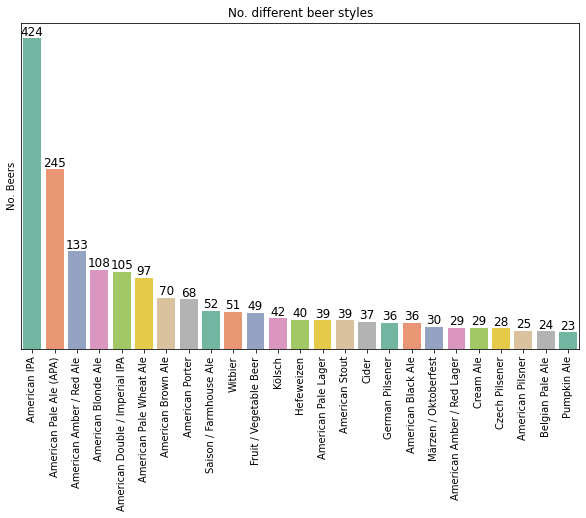

In [166]:
top_styles = styles[styles > 20]

plt.figure(figsize=(10,6))
plt.title('No. different beer styles')
g=sns.barplot(top_styles.index, top_styles, palette='Set2')
g.bar_label(g.containers[0], fmt='%.0f', fontsize=12)
plt.xticks(rotation=90)
plt.yticks([])
plt.ylabel('No. Beers')
plt.show()

In [167]:
#How many zero alcohol craft beers are?
all_zero = all_beers.loc[all_beers['abv'] < 0.5]
all_zero

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
2266,0.1,NaN,606,Scotty K NA,Low Alcohol Beer,522,16.0,Uncommon Brewers,Santa Cruz,CA


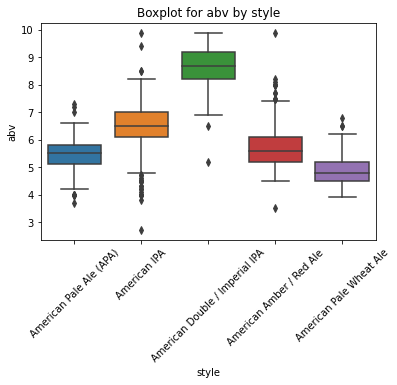

In [181]:
#plt.figure(figsize=(10,10))
topbeers = all_beers[all_beers['style'].isin(['American IPA','American Pale Ale (APA)', 'American Amber / Red Ale','American Double / Imperial IPA', 'American Pale Wheat Ale'])]

sns.boxplot(data=topbeers, x='style', y='abv')
plt.xticks(rotation=45)
plt.title('Boxplot for abv by style')

plt.show()
